<h1> Import the libraries </h1>

In [185]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import os
from sklearn import preprocessing
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

<h1> Reading the CSV File </h1>

In [186]:
#Read the file
path_file=os.getcwd()
car_mpg=pd.read_csv("car.csv")

In [187]:
#Printing the first ten columns of the dataset
car_mpg.head(n=10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


<h1> Dimensions of the Data Set</h1>

In [293]:
car_mpg.shape

(398, 8)

<h1> Information </h1>

In [188]:
#Checking the info
car_mpg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


<h1>Checking for Missing </h1>

In [303]:
#Checking for any missing values
car_mpg.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

<h1> Statistical Analysis</h1>

In [189]:
# Car Statistical Analysis
car_mpg.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000


In [190]:
#Checking for unique values in the object data type
car_mpg.Horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

<h1> Check for Duplicates </h1>

In [244]:
#Checking for duplicates
car_mpg.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

<h1> Pair Plot</h1>

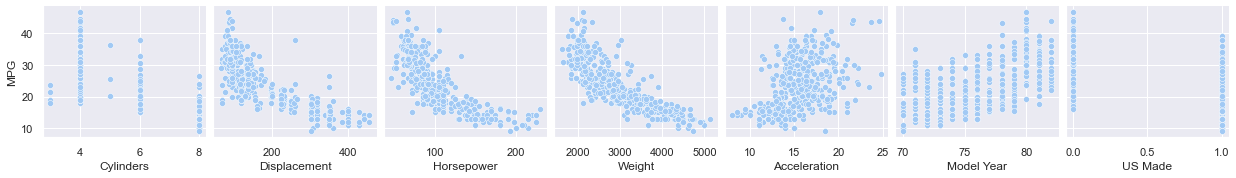

In [263]:
# Creating Pair Plots to understand if there is any outlier

sns.pairplot(car_mpg, x_vars=car_mpg.drop(['MPG'],axis=1, inplace=False).columns, y_vars= ['MPG'])

<h1> Scatter Plot </h1>

<AxesSubplot:xlabel='MPG', ylabel='Acceleration'>

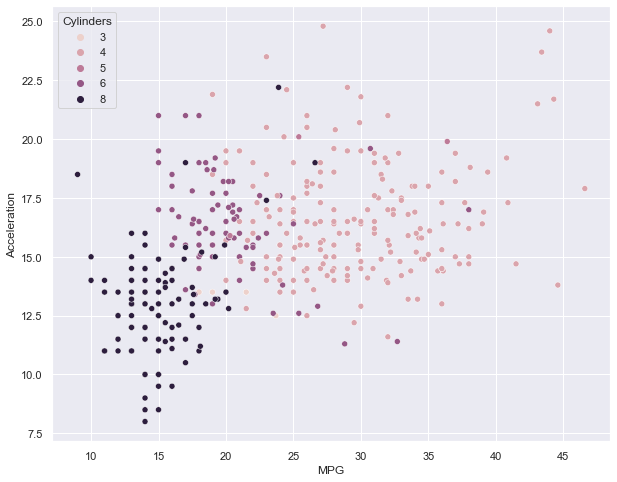

In [279]:
#Create a scatter plot to check any relation between the Acceleration, Number of Cylinders and Miles Per Gallon 
plt.figure(figsize=(10,8))
sns.scatterplot(x='MPG',y='Acceleration',hue='Cylinders',data=car_mpg)


<AxesSubplot:xlabel='MPG', ylabel='Weight'>

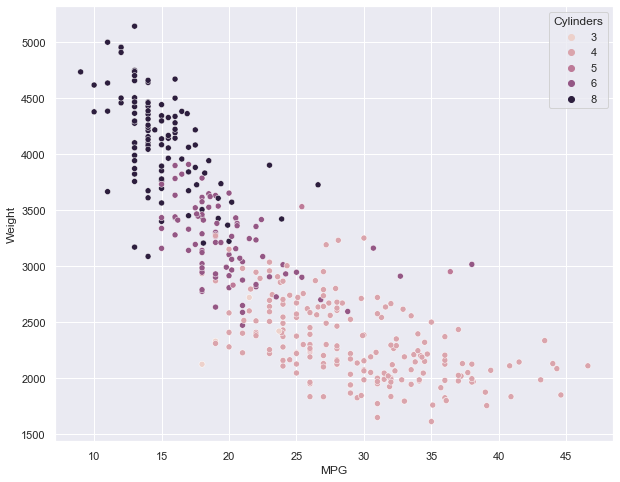

In [318]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='MPG',y='Weight',hue='Cylinders',data=car_mpg)

<h1> Violin Plot</h1>

<AxesSubplot:xlabel='Cylinders', ylabel='MPG'>

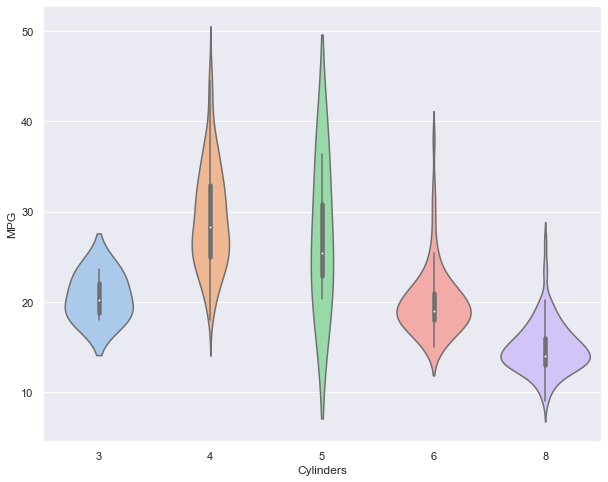

In [306]:
#Violin Plot Cylinder versus Miles per Gallon
plt.figure(figsize=(10,8))
sns.violinplot(x='Cylinders',y='MPG',data=car_mpg)

<h1> Removing the Unwanted Symbols</h1>

In [307]:
#Removing the question Mark and filling the space with the mean horse power

car_mpg.Horsepower = car_mpg.Horsepower.apply(str).str.replace('?','NaN').astype(float)
car_mpg.Horsepower.fillna(car_mpg.Horsepower.mean(),inplace=True)
car_mpg.Horsepower = car_mpg.Horsepower.astype(float)
# print the info of the data again to see the datatypes of columns
car_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


C:\Users\Advance\AppData\Local\Temp/ipykernel_11852/791486899.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_mpg.Horsepower = car_mpg.Horsepower.apply(str).str.replace('?','NaN').astype(float)


<h1> Distribution of the Features of car </h1>

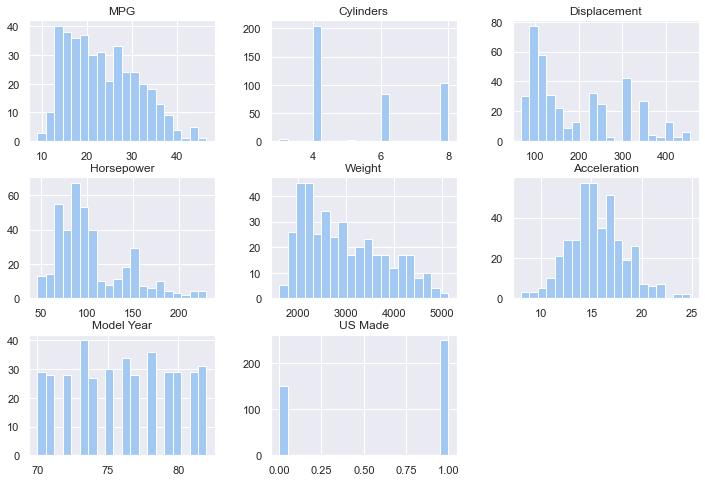

In [308]:
# Visualizing the distribution of the features of the cars
car_mpg.hist(figsize=(12,8),bins=20)
plt.show()

<h1> Heat Map </h1>

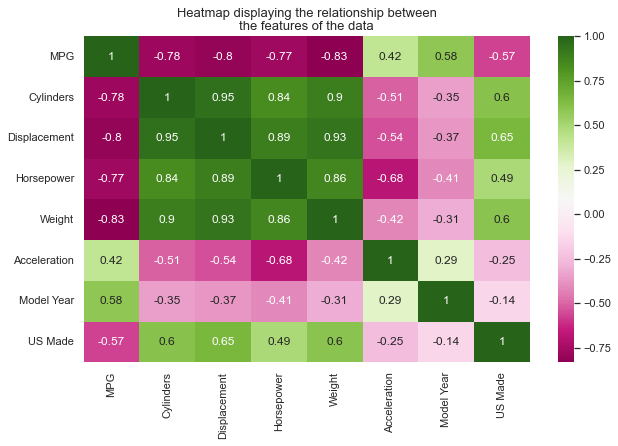

In [309]:
#Correlation between miles per gallon and the other variables in the dataset
plt.figure(figsize=(10,6))
sns.heatmap(car_mpg.corr(),cmap='PiYG',annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

<h1> Multi collinearity </h1>

In [310]:
#Checking the multi collinearity using VIF( )
X1 = sm.tools.add_constant(car_mpg) 
X1

D:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,1.0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1.0,15.0,8,350.0,165.0,3693,11.5,70,1
2,1.0,18.0,8,318.0,150.0,3436,11.0,70,1
3,1.0,16.0,8,304.0,150.0,3433,12.0,70,1
4,1.0,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,1.0,27.0,4,140.0,86.0,2790,15.6,82,1
394,1.0,44.0,4,97.0,52.0,2130,24.6,82,0
395,1.0,32.0,4,135.0,84.0,2295,11.6,82,1
396,1.0,28.0,4,120.0,79.0,2625,18.6,82,1


<h1>VIF Series before and After Selection </h1>

In [311]:
series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)

In [312]:
# dropping the columns that highly correlate with each other
new_cars = car_mpg.drop(['Cylinders','Displacement','Weight'],axis=1)

In [313]:
# Using VIF method again after doing a feature selection

X2 = sm.tools.add_constant(new_cars)


D:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [314]:
series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],
                  index=X2.columns)


In [315]:
print('Series before feature selection: \n\n{}\n'.format(series1))
print('Series after feature selection: \n\n{}'.format(series2))

Series before feature selection: 

const           763.446231
MPG               5.696929
Cylinders        10.720660
Displacement     23.435172
Horsepower        9.043348
Weight           13.694543
Acceleration      2.512519
Model Year        2.035465
US Made           2.092441
dtype: float64

Series after feature selection: 

const           691.164414
MPG               4.020904
Horsepower        4.136177
Acceleration      2.022900
Model Year        1.663170
US Made           1.614071
dtype: float64


<h1> Correlation between MPG and other Variables </h1>

In [316]:
# Correlation b/w the mpg and the remaining variables
print('Correlation between mpg and the remaining variables:\n\n{}'.format(new_cars.corr().MPG))

Correlation between mpg and the remaining variables:

MPG             1.000000
Horsepower     -0.771437
Acceleration    0.420289
Model Year      0.579267
US Made        -0.568192
Name: MPG, dtype: float64


In [317]:
X = new_cars.drop('MPG',axis=1)  # create a DataFrame of feature/independent variables
#type(X)
y = new_cars.MPG   # create a series of the dependent variable
#type(y)
# the feature/independent variables are not of the same scale so we scale them 
# Feature scaling gives fast computing.
X_scaled = preprocessing.scale(X)

X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train,y_train)  # we fit the model with the training data

LinearRegression()

In [145]:
linear_pred = model.predict(X_test)  # make prediction with the fitted model

# score the model on the train set
print('Train score: {}\n'.format(model.score(X_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Train score: 0.7544298891613411

Test score: 0.7362936246735721

Overall model accuracy: 0.7362936246735721

Mean Squared Error: 16.851333847236184


<h1> Ridge Regression </h1>

In [146]:
# let's fit a ridge regression model and see if we can get a higher accuracy
ridge = Ridge(alpha=.01)
ridge.fit(X_train,y_train)  # fit the model with the training data

ridge_pred = ridge.predict(X_test)  # make predictions

# score the model to check the accuracy
print('Train score: {}\n'.format(ridge.score(X_train,y_train)))
print('Test score: {}\n'.format(ridge.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,ridge_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,ridge_pred)))

Train score: 0.7544298877689312

Test score: 0.7362921449368379

Overall model accuracy: 0.7362921449368379

Mean Squared Error: 16.851428405199304


In [147]:
# we now try to tune the parameters of the ridge model for a better accuracy
# we use a grid search to find the best parameters for the ridge model
ridge_model = Ridge()

param = {'alpha':[0,0.1,0.01,0.001,1]}  # define the parameters

# initialize the grid search
ridge_search = GridSearchCV(ridge_model,param,cv=5,n_jobs=-1)

ridge_search.fit(X_train,y_train)   # fit the model 

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1]})

<h1> Lasso </h1>

In [148]:

print('Best parameter found:\n{}'.format(ridge_search.best_params_))
print('Train score: {}\n'.format(ridge_search.score(X_train,y_train)))
print('Test score: {}'.format(ridge_search.score(X_test,y_test)))

Best parameter found:
{'alpha': 1}
Train score: 0.7544162904974933

Test score: 0.736133629303902


In [184]:
# let's try and fit a Lasso model for the regression
# here, we just move on to making the grid search and find the best parameters
lasso = Lasso()

param['max_iter'] = [1000,10000,100000,1000000]

lasso_search = GridSearchCV(lasso,param,cv=5,n_jobs=-1) # initialize the grid search

lasso_search.fit(X_train,y_train)  # fit the model

# print out the best parameters and score it 
print('Best parameter found:\n{}\n'.format(lasso_search.best_params_))
print('Train score: {}\n'.format(lasso_search.score(X_train,y_train)))
print('Test score: {}'.format(lasso_search.score(X_test,y_test)))

Best parameter found:
{'alpha': 0, 'max_iter': 1000}

Train score: 0.7544298891613411

Test score: 0.7362936246735721


D:\python\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
D:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2033.7811516212473, tolerance: 1.6563751546762586
  model = cd_fast.enet_coordinate_descent(


In [150]:
# we move on to using the ensemble methods for the regression
# split the unscaled/original X and y data into training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

<h1> Decision Tree </h1>

In [151]:
dtree = DecisionTreeRegressor() # initialize a DecisionTreeRegressor model

params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}                # define the hyperparameters

tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [152]:
tree_pred = tree_search.predict(xtest)  # make predictions with the model

# print out the best parameters found and score the model
print('Best parameter found:\n{}\n'.format(tree_search.best_params_))
print('Train score: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(tree_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,tree_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,tree_pred)))

Best parameter found:
{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}

Train score: 0.8764643206017688

Test score: 0.7611275863316822

Overall model accuracy: 0.7611275863316822

Mean Squared Error: 16.839012211030983


<h1> Random Forest </h1>

In [153]:
# we now fit a RandomForestRegressor model and perform a grid search to find the best 
# parameters
forest = RandomForestRegressor()

# we add the n_estimators parameter in our previous parameter dictionary
params['n_estimators'] = [100,200,300,400,500]

forest_search = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,     # initialize the search
                                  n_iter=50)

forest_search.fit(xtrain,ytrain)  # fit the model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [154]:
forest_pred = forest_search.predict(xtest)  # make prediction with the model

# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(forest_search.best_params_))
print('Train score: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(forest_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,forest_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,forest_pred)))


Best parameter found:
{'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 7}

Train score: 0.9449110285946899

Test score: 0.8533205988782191

Overall model accuracy: 0.8533205988782191

Mean Squared Error: 10.339981032828542


<h1> Gradient Boosting </h1> 

In [199]:
# train a GradientBoostingRegressor model

gradient_model = GradientBoostingRegressor()  # instantiate the model

# append a learning_rate parameter to the parameter dictionary
params['learning_rate'] = [0.05,0.1,0.2,0.3,0.4,0.5]

gradient_search = RandomizedSearchCV(gradient_model,params,cv=5,n_jobs=-1,
                                  n_iter=50)   # initialize the search

gradient_search.fit(xtrain,ytrain)   # fit the model

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [156]:
gradient_pred = gradient_search.predict(xtest)  # make predictions with the model

# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {}\n'.format(gradient_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(gradient_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,gradient_pred)))
print('Mean Squared Error: {}\n'.format(mean_squared_error(ytest,gradient_pred)))
print('This model is not too overfitted and it has low mean squared error \
so we use this one........')

Best parameter found:
{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.05}

Train score: 0.9381725797665585

Test score: 0.8447794191936404

Overall model accuracy: 0.8447794191936404

Mean Squared Error: 10.942080818218312

This model is not too overfitted and it has low mean squared error so we use this one........


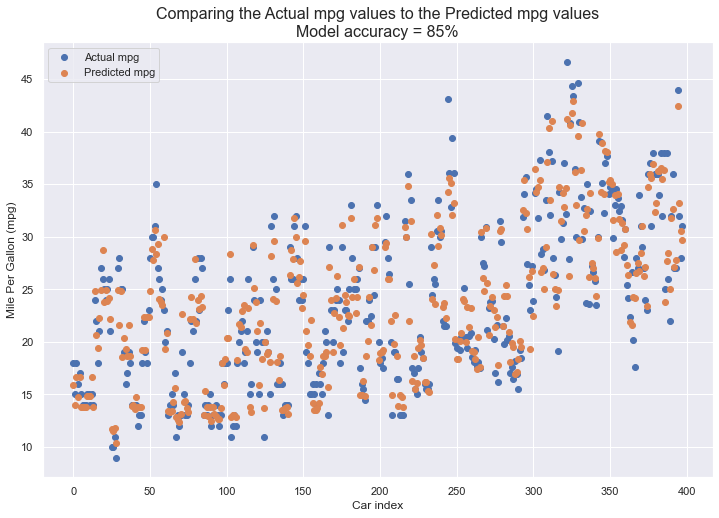

In [243]:
# we will now try to make predictions and see how well our model predicts
# we will visualize the actual mpg values recorded and the mpg values predicted by our 
# model to see how close our predictions are to the actual values.

new_cars

  # create a new DataFrame of the feature variables
newcars_new = new_cars.drop('MPG',axis=1) 
# make a DataFrame of the actual mpg and the predicted mpg 
data = pd.DataFrame({'Actual mpg':new_cars.MPG.values,'Predicted mpg':gradient_search.predict(newcars_new.values)})


# # # make a scatter plot of the actual and the predicted mpg of a car
plt.figure(figsize=(12,8))
plt.scatter(data.index,data['Actual mpg'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted mpg'].values,label='Predicted mpg')
plt.title('Comparing the Actual mpg values to the Predicted mpg values\nModel accuracy = 85%',fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#References


In [ ]:
#Owusu, P. (2021b, December 12). Multiple Regression in python using Scikit-Learn:Predicting the Miles Per Gallon (mpg) of cars. Medium. Retrieved October 5, 2022, from https://medium.com/@powusu381/multiple-regression-in-python-using-scikit-learn-predicting-the-miles-per-gallon-mpg-of-cars-4c8e512234be